In [40]:
push!(LOAD_PATH, "../src")
include("../src/lanczos.jl")
include("../src/estimators.jl")

using .StochasticLanczos
using .Estimators
using LinearAlgebra
using Plots

In [41]:
include("bcsstk26_case.jl")

3.301334524101462e12

In [42]:
s_vals = collect(8:16:1000)
b = 4
k = 25
hutch_pp_estimates = Vector{Float64}()
hutch_estimates    = Vector{Float64}()
for s in s_vals
    println(s)
    Ω_provided = rand([-1, 1], n, s)
    push!(hutch_estimates,    hutchinson_estimator(f, matvecA, n, s, b, k; Ω_provided=Ω_provided))
    push!(hutch_pp_estimates, hutch_pp_estimator(f, matvecA, n, s, b, k; Ω_provided=Ω_provided))
end

8
24
40
56
72
88
104
120
136
152
168
184
200
216
232
248
264
280
296
312
328
344
360
376
392
408
424
440
456
472
488
504
520
536
552
568
584
600
616
632
648
664
680
696
712
728
744
760
776
792
808
824
840
856
872
888
904
920
936
952
968
984
1000


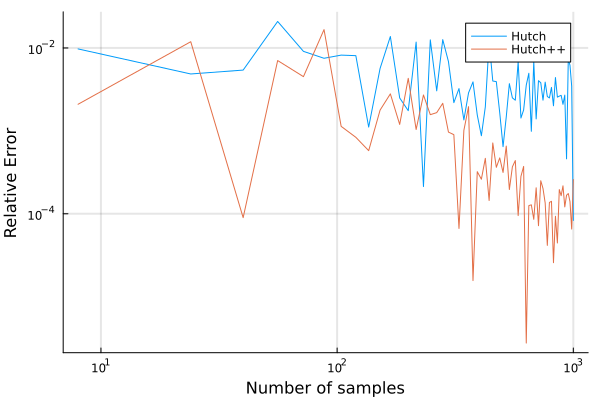

In [ ]:
p = plot(s_vals, abs.((hutch_estimates .- exact)./exact), label="Hutch", xlabel="Number of samples", ylabel="Relative Error", gridlinewidth=2,
    xscale=:log10, yscale=:log10)
plot!(p, s_vals, abs.((hutch_pp_estimates .- exact)./exact), label="Hutch++")
plot!(dpi=300)

In [ ]:
savefig("hutch_pp_benchmark.png")